
Линейные модели машинного обучения, ч. 2

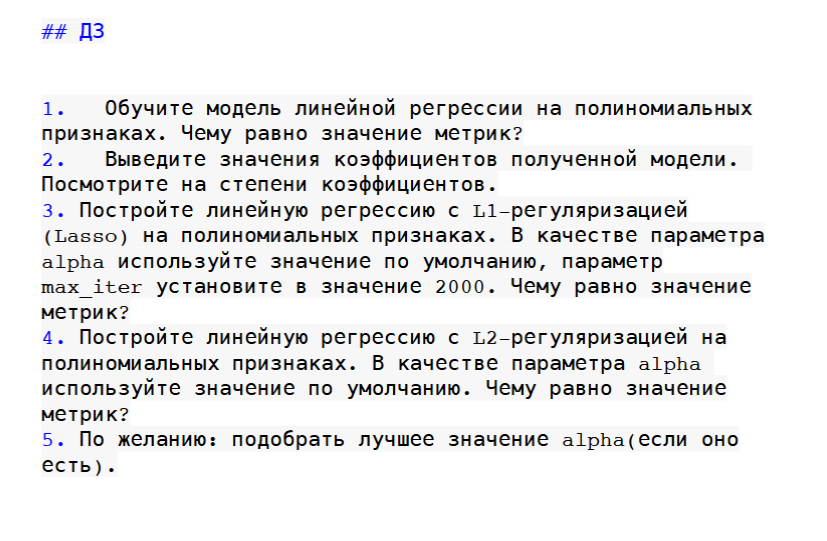

Import libraries:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Let's take a look at the data:

In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let's find out the size of the data:

In [ ]:
data.shape

(1338, 7)

Checking for gaps:

In [ ]:
data.isnull().sum().sum()

0

The data is fine, we can create a model.

Categorical data, as seen from data.head(), are the second, fifth and sixth columns, and numeric data are the first, third, fourth and seventh.

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

Transform categorical features:

In [ ]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

Dividing the data into targets and features:

In [ ]:
X = data.drop('charges', axis=1)
y = data['charges']

Let's divide the data into test and training samples:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

And let's create polynomial features:

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

normalize them:

In [ ]:
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

create a model:

In [ ]:
model = LinearRegression()

Let's teach her:

In [ ]:
model.fit(X_train_poly, y_train)

LinearRegression()

making some predictions:

In [ ]:
y_pred = model.predict(X_test_poly)

We derive the model metrics:

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 20712805.98791837
R2: 0.866583090316484


Let's derive the coefficients of the model:

In [ ]:
coefficients = model.coef_
feature_names = poly.get_feature_names_out(input_features=X.columns)
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
print(coef_df)
print("\nFeature names (with polynomial degrees):")
print(feature_names)

                                    Coefficient
1                                  1.490168e-11
age                               -1.529010e+03
bmi                                2.871210e+03
children                           1.715350e+03
sex_male                          -5.990962e+02
smoker_yes                        -4.247041e+03
region_northwest                  -3.076230e+02
region_southeast                   1.795240e+02
region_southwest                  -1.470635e+02
age^2                              4.469191e+03
age bmi                            3.053938e+02
age children                      -3.799499e+02
age sex_male                       3.893290e+02
age smoker_yes                     6.219199e+01
age region_northwest               4.481244e+02
age region_southeast               9.373657e+02
age region_southwest               1.130415e+03
bmi^2                             -2.686530e+03
bmi children                       3.204630e+02
bmi sex_male                       2.775

construct a linear regression with L1 regularization:

In [ ]:
lasso_model = Lasso(alpha=1.0, max_iter=2000)

In [ ]:
lasso_model.fit(X_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(max_iter=2000)

make predictions and calculate metrics:

In [ ]:
y_pred_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"MSE: {mse_lasso}")
print(f"R2: {r2_lasso}")

MSE: 20688483.961768642
R2: 0.866739755211044


construct a linear regression with L2 regularization:

In [ ]:
ridge_model = Ridge(alpha=1.0)

In [ ]:
ridge_model.fit(X_train_poly, y_train)

Ridge()

make predictions and find out the metrics:

In [ ]:
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"MSE: {mse_ridge}")
print(f"R2: {r2_ridge}")

MSE: 20712378.23892742
R2: 0.8665858455659913


let's derive the coefficients of the model:

In [ ]:
coef_df_ridge = pd.DataFrame(ridge_model.coef_, index=feature_names, columns=['Coefficient'])
print(coef_df_ridge)

                                    Coefficient
1                                      0.000000
age                                -1218.364613
bmi                                 2645.813303
children                            1541.305657
sex_male                            -576.025798
smoker_yes                         -3977.770455
region_northwest                    -294.113242
region_southeast                     174.329949
region_southwest                    -139.284561
age^2                               4220.287175
age bmi                              269.635836
age children                        -347.140862
age sex_male                         356.499774
age smoker_yes                        60.988691
age region_northwest                 405.650166
age region_southeast                 882.364309
age region_southwest                1078.359871
bmi^2                              -2413.946094
bmi children                         424.763853
bmi sex_male                         272